In [119]:
import pandas as pd
df = pd.read_csv("c:/Users/Quang/Customer-Segmentation/data/raw/Mall_Customers.csv")

## Xử lý Missing Values

In [121]:
missing_report = df.isnull().sum().to_frame(name='Missing Values')
missing_report['Missing %'] = (missing_report['Missing Values'] / len(df)) * 100
print(missing_report)

                        Missing Values  Missing %
CustomerID                           0        0.0
Gender                               0        0.0
Age                                  0        0.0
Annual Income (k$)                   0        0.0
Spending Score (1-100)               0        0.0


##### --> Không có Missing Vales

## Xử lý Outliers

In [123]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
    
outliers_income = detect_outliers(df, 'Annual Income (k$)')
outliers_spending = detect_outliers(df, 'Spending Score (1-100)')

print(f"Số outliers trong Annual Income: {len(outliers_income)}")
print(f"Số outliers trong Spending Score: {len(outliers_spending)}")

Số outliers trong Annual Income: 2
Số outliers trong Spending Score: 0


##### Phát hiện 2 Outliers

In [125]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Annual Income (k$)'] = df['Annual Income (k$)'].clip(lower=lower_bound, upper=upper_bound)

In [35]:
print(f"Số outliers trong Annual Income: {len(outliers_income)}")
print(f"Số outliers trong Spending Score: {len(outliers_spending)}")

Số outliers trong Annual Income: 0
Số outliers trong Spending Score: 0


##### Xử lý và kiểm tra lại outliers

## Feature Engineering

##### Phân nhóm tuổi

In [127]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [63]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group
0,1,Male,19,15,39,Young Adult
1,2,Male,21,15,81,Young Adult
2,3,Female,20,16,6,Young Adult
3,4,Female,23,16,77,Young Adult
4,5,Female,31,17,40,Adult
5,6,Female,22,17,76,Young Adult
6,7,Female,35,18,6,Adult
7,8,Female,23,18,94,Young Adult
8,9,Male,64,19,3,Senior
9,10,Female,30,19,72,Adult


##### Encoding biến phân loại

In [139]:
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [131]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Gender_Encoded
0,1,Male,19,15.0,39,Young Adult,0
1,2,Male,21,15.0,81,Young Adult,0
2,3,Female,20,16.0,6,Young Adult,1
3,4,Female,23,16.0,77,Young Adult,1
4,5,Female,31,17.0,40,Adult,1


##### Tỷ lệ chi tiêu/thu nhập

In [141]:
df['Spending_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']

In [143]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Gender_Encoded,Spending_Income_Ratio
0,1,Male,19,15.0,39,Young Adult,0,2.600000
1,2,Male,21,15.0,81,Young Adult,0,5.400000
2,3,Female,20,16.0,6,Young Adult,1,0.375000
3,4,Female,23,16.0,77,Young Adult,1,4.812500
4,5,Female,31,17.0,40,Adult,1,2.352941


### ==> Lưu cleaned_data.csv tại bước này

In [145]:
df.to_csv('C:/Users/Quang/Customer-Segmentation/data/processed/cleaned_data.csv', index=False)

## Chuẩn hóa Dữ liệu

##### Bước 1: Import thư viện

In [81]:
from sklearn.preprocessing import StandardScaler

##### Bước 2: Chọn features cần chuẩn hóa

In [84]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

##### Bước 3: Khởi tạo và huấn luyện scaler

In [87]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

##### Bước 4: Gán dữ liệu đã chuẩn hóa vào DataFrame

In [90]:
df[numerical_features] = scaled_data

##### Bước 5: Lưu scaler để sử dụng sau `

In [102]:
import joblib
joblib.dump(scaler, 'C:/Users/Quang/Customer-Segmentation/models/scaler.pkl')  # Lưu scaler vào thư mục models/

['C:/Users/Quang/Customer-Segmentation/models/scaler.pkl']

In [104]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Gender_Encoded,Spending_Income_Ratio
0,1,Male,-1.424569,-1.738999,-0.434801,Young Adult,0,2.600000
1,2,Male,-1.281035,-1.738999,1.195704,Young Adult,0,5.400000
2,3,Female,-1.352802,-1.700830,-1.715913,Young Adult,1,0.375000
3,4,Female,-1.137502,-1.700830,1.040418,Young Adult,1,4.812500
4,5,Female,-0.563369,-1.662660,-0.395980,Adult,1,2.352941


##### Bước 6:Kiểm tra kết quả chuẩn hóa

Age                      -1.021405e-16
Annual Income (k$)       -2.131628e-16
Spending Score (1-100)   -1.465494e-16
dtype: float64
Age                       1.002509
Annual Income (k$)        1.002509
Spending Score (1-100)    1.002509
dtype: float64


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

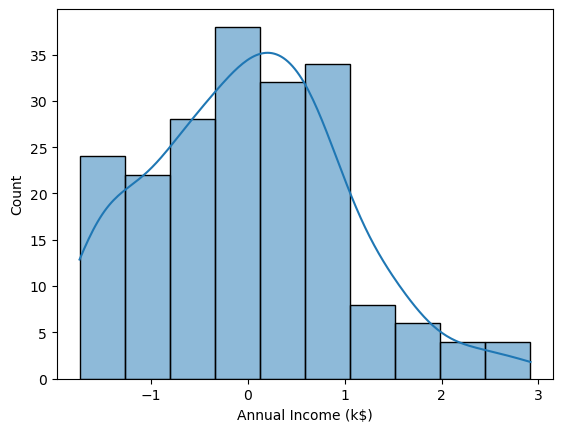

In [108]:
print(df[numerical_features].mean())  # Kết quả mong đợi: ~0
print(df[numerical_features].std())   # Kết quả mong đợi: ~1

import seaborn as sns
sns.histplot(df['Annual Income (k$)'], kde=True)

In [147]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Gender_Encoded,Spending_Income_Ratio
0,1,Male,19,15.0,39,Young Adult,0,2.600000
1,2,Male,21,15.0,81,Young Adult,0,5.400000
2,3,Female,20,16.0,6,Young Adult,1,0.375000
3,4,Female,23,16.0,77,Young Adult,1,4.812500
4,5,Female,31,17.0,40,Adult,1,2.352941
